The process for OTE-01 and OTE-02 will be the same, the difference being that OTE-02 will have PSFs that are not saturated and we will have the precise boresight. Both sets of images are expecting to have high backgrounds.

To do:
- get boresight
- get estimate of segment ID


take the locations of the PSFs in the image:
- get the encircled energy and FWHM for each PSF (use the modified poppy functions and photutils?)
- find distance to boresight center for each
- cut out each psf and put in a 2048x2048 at the locations in the LOS-02 image
    - what happens if there are some PSFs we don't know which one it is?
    - use jwst_magic.convert_image.convert_image_to_raw_fgs.create_seed_image, create my own all_psfs file?

measure ellipticity?
photometric correction?

In [36]:
import os

from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.colors import from_levels_and_colors
import numpy as np
import pandas as pd

from jwst_magic import convert_image

%matplotlib inline

In [4]:
# DO NOT CHANGE THESE LOCATIONS
SEGMENTS = ["A1-1", "A2-2", "A3-3", "A4-4", "A5-5", "A6-6", 
            "B1-7","B2-9", "B3-11", "B4-13", "B5-15", "B6-17", 
            "C1-8", "C2-10", "C3-12", "C4-14", "C5-16", "C6-18"]
GA_PSF_LOCATIONS = {'A1-1':[1015, 1210],
                    'A2-2':[856, 1116],
                    'A3-3':[864, 931],
                    'A4-4':[1023, 837],
                    'A5-5':[1180, 936],
                    'A6-6':[1185 , 1126],
                    'B1-7':[1011, 1402],
                    'B2-9':[691, 1208],
                    'B3-11':[686, 822],
                    'B4-13':[1027, 676],
                    'B5-15':[1346, 843],
                    'B6-17':[1335, 1213],
                    'C1-8':[854, 1300],
                    'C2-10':[695, 1019],
                    'C3-12':[866, 742],
                    'C4-14':[1188, 744],
                    'C5-16':[1342, 1033],
                    'C6-18':[1172, 1304]
                    }

In [61]:
def distance_to_boresight(x, y, truth_x, truth_y):
    '''
    calculate the distance from the PSF in OTE-01 to it's location in OTE-06/LOS-02
    
    truth_x and truth_y are the location of the boresight
    '''
    
    return np.sqrt( (truth_x - x)**2 + (truth_y - y)**2 )


# OTE-01 

In [6]:
car = 'OTE-01'
program_id = 1134

In [7]:
main_directory = '/ifs/jwst/tel/TeamPractices/'

In [8]:
sw_mosaic = os.path.join(main_directory, 'OTE-01/Ball_Deployment-2/WARM/output/mosaic0_quip.fits')
# other data
# mosaic0_quip_obs1_LW_cold.fits
# mosaic0_quip_obs1_SW_cold.fits
# mosaic0_quip_obs2_LW_cold.fits
# mosaic0_quip_obs2_SW_cold.fits
image = fits.getdata(sw_mosaic)

In [31]:
# Define boresight_location - get this from Shadow
boresight_location = (300, 3700)

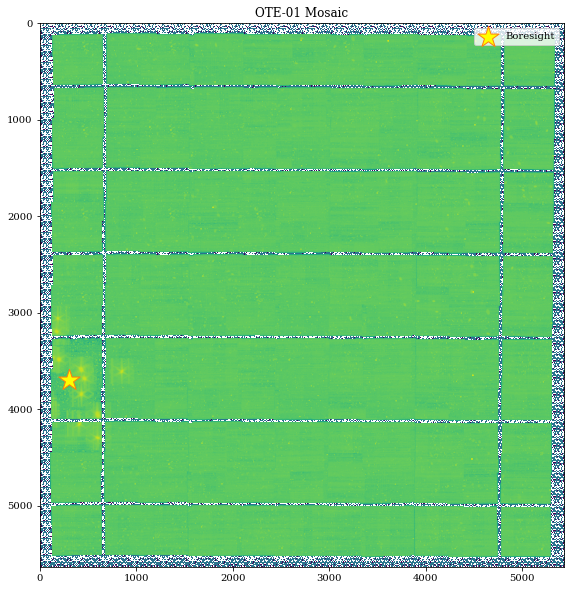

In [39]:
#correct negative pixels
image[image<=0] = 3e-20

plt.figure(figsize=(10, 10))
plt.imshow(image, norm=LogNorm())
plt.title(f"{car} Mosaic")
plt.scatter(boresight_location[0], boresight_location[1], s=500, marker='*', c='yellow', edgecolor='C1', label='Boresight')
plt.legend()
plt.show()

In [38]:
# will probably need to edit this function to work for me
# the root and out_dir are not used so you can make them none
# need to make an all found psfs file with the known locations 
seed_image = convert_image.convert_image_to_raw_fgs.create_seed_image(image, guider=1, root=None, 
                                                                    out_dir=None, 
                                                                    smoothing='default', 
                                                                    psf_size=None, 
                                                                    all_found_psfs_file=None)



2021-10-13 12:08:28,454 - stpipe - WARNING - /Users/kbrooks/miniconda2/envs/magic/lib/python3.7/site-packages/astropy/stats/sigma_clipping.py:355: AstropyUserWarning: Input data contains invalid values (NaNs or infs), which were automatically clipped.
  AstropyUserWarning)

2021-10-13 12:08:30,859 - stpipe - WARNING - /Users/kbrooks/miniconda2/envs/magic/lib/python3.7/site-packages/astropy/stats/sigma_clipping.py:355: AstropyUserWarning: Input data contains invalid values (NaNs or infs), which were automatically clipped.
  AstropyUserWarning)



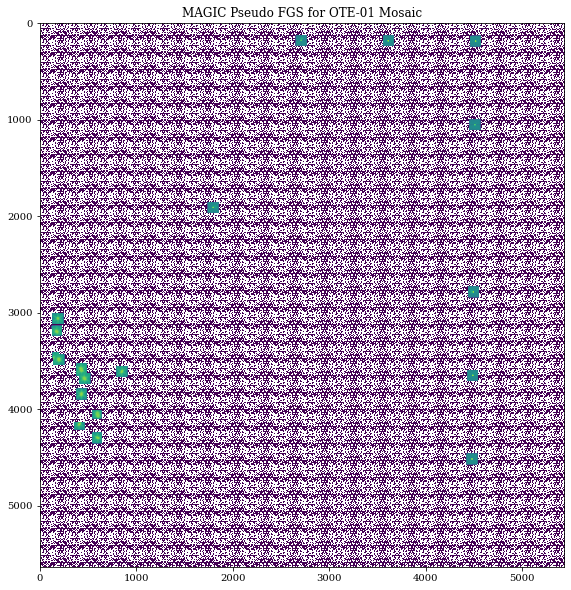

In [42]:
plt.figure(figsize=(10, 10))
plt.imshow(seed_image, norm=LogNorm())
plt.title(f"MAGIC Pseudo FGS for {car} Mosaic")
#plt.scatter(boresight_location[0], boresight_location[1], s=500, marker='*', c='yellow', edgecolor='C1', label='Boresight')
#plt.legend()
plt.show()

In [44]:
# gauss_sigma = 5 #default
# data = seed_image.astype(float)
# smoothed_data = ndimage.gaussian_filter(data, sigma=gauss_sigma)
# num_psfs, coords, threshold = convert_image.convert_image_to_raw_fgs.count_psfs(smoothed_data, gauss_sigma, 
#                                                                                 npeaks=np.inf, choose=False)

x_list, y_list, countrate, _ = convert_image.convert_image_to_raw_fgs.create_all_found_psfs_file(seed_image, 
                                                                                                 guider=1, 
                                                                                                 root=None, 
                                                                                                 out_dir=None, 
                                                                                                 smoothing='default', 
                                                                                                 save=False)

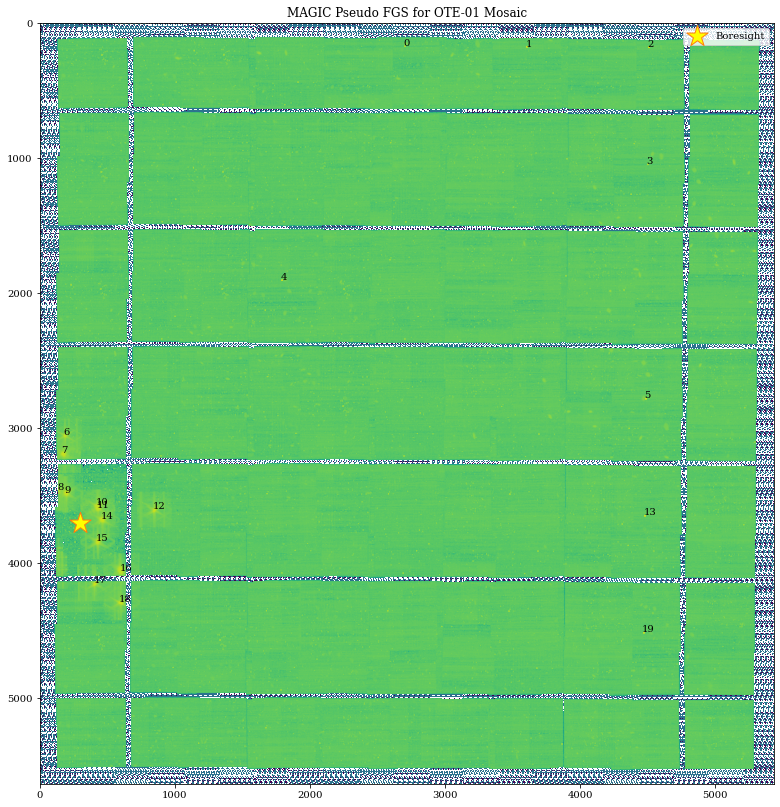

In [52]:
plt.figure(figsize=(14, 14))
plt.imshow(image, norm=LogNorm())
plt.title(f"MAGIC Pseudo FGS for {car} Mosaic")
plt.scatter(boresight_location[0], boresight_location[1], s=500, marker='*', c='yellow', edgecolor='C1', label='Boresight')
#plt.scatter(x_list, y_list, label='Found PSFs')
for i, (x, y) in enumerate(zip(x_list, y_list)):
    plt.annotate(i, (x, y), (x-10, y-10))#, c='yellow')

plt.legend()
plt.show()

In [72]:
# With the help of Shadow, determine which of the labelled PSFs are associated with a segment
# In the dictionary below, put the number from above BEFORE the ":" for each segment where Shadow thinks we have a
#  match. Delete any entries where the segment is unknown
matching_dictionary = { 10:'A1-1', 
                        15:'A2-2', 
                        6:'A3-3', 
                        18:'A4-4'#, 
#                         :'A5-5', 
#                         :'A6-6', 
#                         :'B1-7',
#                         :'B2-9', 
#                         :'B3-11', 
#                         :'B4-13', 
#                         :'B5-15', 
#                         :'B6-17', 
#                         :'C1-8', 
#                         :'C2-10', 
#                         :'C3-12', 
#                         :'C4-14', 
#                         :'C5-16', 
#                         :'C6-18'
                      } 


In [73]:
# Match the location to the segment based on the matching dictionary
seg_location_dictionary = {matching_dictionary[ind] : {'location': (x_list[ind], 
                                                                    y_list[ind])} for ind in matching_dictionary.keys()}

seg_location_dictionary


{'A1-1': {'location': (427, 3578)},
 'A2-2': {'location': (427, 3842)},
 'A3-3': {'location': (185, 3058)},
 'A4-4': {'location': (597, 4294)}}

In [74]:
# Calculate the distance from each segment to the boresight
truth_x, truth_y = boresight_location

for key, value in seg_location_dictionary.items():
    x, y = seg_location_dictionary[key]['location'] 
    seg_location_dictionary[key]['dist'] = distance_to_boresight(x, y, truth_x, truth_y)
    
seg_location_dictionary

{'A1-1': {'location': (427, 3578), 'dist': 176.1050822662424},
 'A2-2': {'location': (427, 3842), 'dist': 190.50721771103582},
 'A3-3': {'location': (185, 3058), 'dist': 652.2185216627936},
 'A4-4': {'location': (597, 4294), 'dist': 664.1121893174376}}

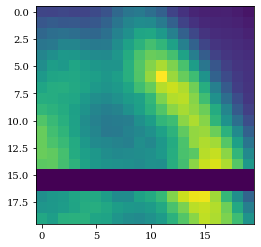

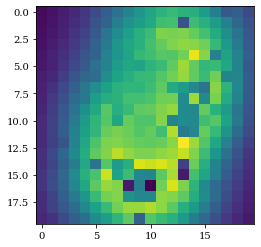

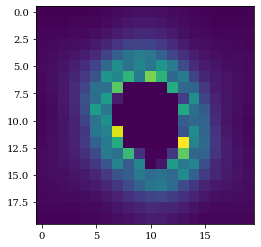

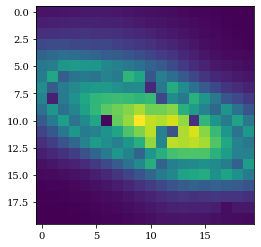

In [89]:
# put postage stamps in new locations
# for known segs in GA_PSF_LOCATIONS: 
# plot in new image of zeros at their LOS-02 location
box = 10
large_image_array = np.zeros([2048, 2048])

for seg in seg_location_dictionary.keys():
    mosaic_x, mosaic_y = seg_location_dictionary[seg]['location']
    psf = image[mosaic_y-box:mosaic_y+box, mosaic_x-box:mosaic_x+box]
    ga_x, ga_y = GA_PSF_LOCATIONS[seg]
    large_image_array[ga_y-box: ga_y+box, ga_x-box:ga_x+box] = psf

large_image_array[large_image_array<=0] = 3e-20

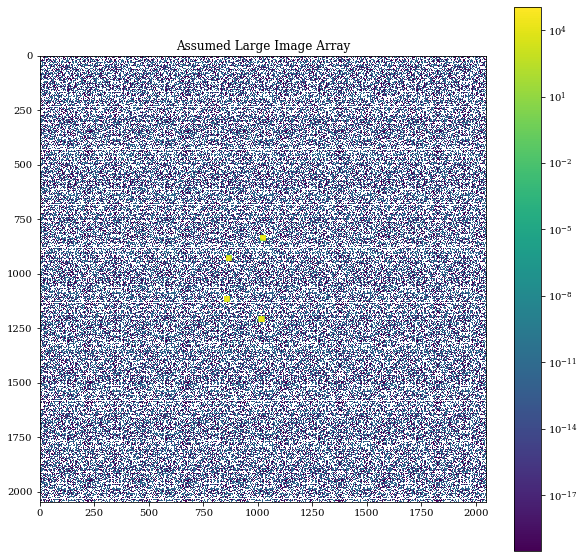

In [90]:
plt.figure(figsize=(10, 10))
plt.imshow(large_image_array, norm=LogNorm())
plt.title(f"Assumed Large Image Array")
plt.colorbar()
plt.show()

In [ ]:
# colors - check that this works
dists = None #TODO
lowest = np.mean(dists)
cmap, norm = from_levels_and_colors([lowest, 0.5, 1.5, 2.0], ['green', 'yellow', 'red']) #RdYlGn - numbers are fake

In [ ]:
# plot out new image with distance color coded by how far from boresight

plt.figure(figsize=(10, 10))
plt.imshow(new_image, norm=LogNorm())
# calculate distances
for seg in dictionary.keys(): #only do this for the segs we know
    if seg in segments: # make sure this only gets applied for the segments we know the names of 
        y, x = dictionary[seg]

    plt.annotate(dist, (y, x), (y+10, x+10), c=z, cmap=cmap, norm=norm) #what is c=z?
plt.show()

# OTE-02
Do the same thing as OTE-01, just with better information

# OTE-03
Do the same thing?

# OTE-04
Do the same thing but with actual knowledge of PSF locations

# Get simulated NIRCam locations of LOS-02 PSFs 

In [8]:
los02_image = fits.getdata('/ifs/jwst/tel/LRE5/LOS-02/output/LRE5-RfR/jw01410002001_02101_00001_nrca3_cal.fits')

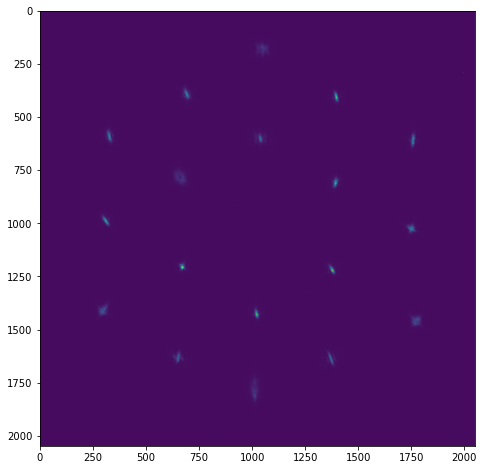

In [9]:
plt.figure(figsize=(10, 8))
plt.imshow(los02_image)

In [10]:
# mapping of magic segment labels to WSS numbers

# Do not change this cell

# MAGIC segment labels to segment naming map
SEGMENT_MAP_G1 = {"A":"B4-13", "B":"C4-14", "C":"C3-12", "D":"B5-15",
                  "E":"A4-4", "F":"B3-11", "G":"A5-5", "H":"A3-3", 
                  "I":"C5-16", "J":"C2-10", "K":"A6-6", "L":"A2-2", 
                  "M":"B6-17", "N":"A1-1", "O":"B2-9", "P":"C6-18", 
                  "Q":"C1-8", "R":"B1-7"}


SEGMENTS = ["A1-1", "A2-2", "A3-3", "A4-4", "A5-5", "A6-6", 
            "B1-7","B2-9", "B3-11", "B4-13", "B5-15", "B6-17", 
            "C1-8", "C2-10", "C3-12", "C4-14", "C5-16", "C6-18"]

In [16]:
guider = 1
segment_map = [SEGMENT_MAP_G1 if guider==1 else SEGMENT_MAP_G2][0]

In [18]:
# Make table
out_dir = '/Users/kbrooks/git_repos/jwst-magic-fork/out/'# +car+out/
root = 'test_los02'
all_psfs_filename = os.path.join(out_dir, root, 
                                 f'unshifted_all_found_psfs_{root}_G{guider}.txt')
all_psfs_table = pd.read_csv(all_psfs_filename, comment='#', 
                             names=['label', f'y', f'x', 
                                    f'countrate'], sep=' ')
segments = [segment_map[label] for label in all_psfs_table['label']]

# Add the segment name to the table
all_psfs_table.insert(1, 'segment', segments)
all_psfs_table = all_psfs_table.sort_values('segment', ascending=True)

In [23]:
all_psfs_locations = all_psfs_table[['segment', 'y','x']]

all_psfs_locations

,segment,y,x
8,A1-1,1015.0,1210.0
4,A2-2,856.0,1116.0
5,A3-3,864.0,931.0
9,A4-4,1023.0,837.0
12,A5-5,1180.0,936.0
13,A6-6,1185.0,1126.0
7,B1-7,1011.0,1402.0
1,B2-9,691.0,1208.0
0,B3-11,686.0,822.0
10,B4-13,1027.0,676.0


In [27]:
truth_locations = all_psfs_locations.set_index('segment').T.to_dict('list')
truth_locations

{'A1-1': [1015.0, 1210.0],
 'A2-2': [856.0, 1116.0],
 'A3-3': [864.0, 931.0],
 'A4-4': [1023.0, 837.0],
 'A5-5': [1180.0, 936.0],
 'A6-6': [1185.0, 1126.0],
 'B1-7': [1011.0, 1402.0],
 'B2-9': [691.0, 1208.0],
 'B3-11': [686.0, 822.0],
 'B4-13': [1027.0, 676.0],
 'B5-15': [1346.0, 843.0],
 'B6-17': [1335.0, 1213.0],
 'C1-8': [854.0, 1300.0],
 'C2-10': [695.0, 1019.0],
 'C3-12': [866.0, 742.0],
 'C4-14': [1188.0, 744.0],
 'C5-16': [1342.0, 1033.0],
 'C6-18': [1172.0, 1304.0]}

In [30]:
truth_locations == ga_psf_locations

True